# Homework #1: AB-testing<br>and the Multi-Armed Bayesian Bandit

#### Serena Ban (banseri)
#### Collaborator: Seo Won Yi (yiseo)

### Introduction

Consider three vending machines labeled A, B, and C, each with the capability of either dispensing a product successfully (i.e., success) or accepting money without providing a product (i.e., failure). 

Assume that the probability of success for vending machines A, B, and C all follow independent Bernoulli distributions (equivalent to Binomial distribution with n = 1), where 1 indicates success and 0 indicates failure. 
Note that we do not have any previous knowledge of these three vending machines. Note: $P(A|\theta_{A})$, $P(B|\theta_{B})$ and $P(C|\theta_{C})$ will be used as a likelihood.

Following summarizes above discussion.

$A_{success} \sim Bern(\theta_{A})$

which can also be written as: 

$P(A|\theta_{A})$ = $\theta_{A}^{a} \cdot (1-\theta_{A})^{1-a}$ for a $\in$ {0, 1}

$B_{success} \sim Bern(\theta_{B})$

which can also be written as: 

$P(B|\theta_{B})$ = $\theta_{B}^{b} \cdot (1-\theta_{B})^{1-b}$ for b $\in$ {0, 1}

$C_{success} \sim Bern(\theta_{C})$

which can also be written as: 

$P(C|\theta_{C})$ = $\theta_{C}^c \cdot (1-\theta_{C})^{1-c}$ for c $\in$ {0, 1}

Below is a randomly chosen arbitrary number representing the probability of success, which will be used for checking purposes in the future. For the purpose of this experiment, these true parameters (i.e., $\theta_{A}$, $\theta_{B}$, and $\theta_{C}$) are considered unknown.

$\theta_{A} = 0.7$

$\theta_{B} = 0.3$

$\theta_{C} = 0.5$


By Bayesian terminology, posterior is always proportional to the joint distribution (i.e., likelihood $\cdot$ prior). Therefore, we can write-out the posterior distribution's relationship as following where $P(A|\theta_{A})$, $P(B|\theta_{B})$ and $P(C|\theta_{C})$ are likelihood  and $P(\theta_{A})$, $P(\theta_{B})$, and $P(\theta_{C})$ are prior:

$P(\theta_{A}|A) \propto P(A|\theta_{A})\cdot P(\theta_{A})$

$P(\theta_{B}|B) \propto P(B|\theta_{B})\cdot P(\theta_{B})$

$P(\theta_{B}|C) \propto P(C|\theta_{C})\cdot P(\theta_{C})$

To begin this algorithm, since we lack any prior knowledge about these three vending machines, we choose uninformative prior distributions for all three machines. Here, we choose a Beta distribution with $\alpha$ = 1 and $\beta$ = 1 (which is equivalent to a Uniform distribution) to begin. 

Therefore, Beta distributions (for all machines) to begin this algorithm can be written as following:

$P(\theta_{A})$ = $\beta(1,1)$ = $\frac{\Gamma(1+1)}{\Gamma(1)\cdot\Gamma(1)}\cdot\theta_{A}^{1-1}\cdot(1-\theta_{A})^{1-1}$

$P(\theta_{B})$ = $\beta(1,1)$ = $\frac{\Gamma(1+1)}{\Gamma(1)\cdot\Gamma(1)}\cdot\theta_{B}^{1-1}\cdot(1-\theta_{B})^{1-1}$

$P(\theta_{C})$ = $\beta(1,1)$ = $\frac{\Gamma(1+1)}{\Gamma(1)\cdot\Gamma(1)}\cdot\theta_{C}^{1-1}\cdot(1-\theta_{C})^{1-1}$

We simulate from Beta distributions to choose the machine to make an initial choice from. In particular, we observe the maximum value from the simulated samples from the above distributions and choose the corresponding machine to gather a single data.

Now that we know which vending machine resulted in maximum, we'll draw the machine to see a success or a failure.
This distribution with success or failure can be explained using a Bernoulli distribution or a Binomial distribution with the number of trials being 1. From coding, this can be done by sampling one from Binomial distribution with parameter specified earlier ($\theta_{A}, \theta_{B}$, and $\theta_{C}$).

Then, with this result, we can recalculate/update the posterior distirbution.

That is, suppose we decided to gather a single data from machine A, then we will have the following analytical result.

Note: $\alpha_{A}, \beta_{A}$ are used as parameters of Beta distribution for prior distribution to generalize the process

\begin{align*}
    P(\theta_{A}|A) &\propto P(A|\theta_{A})\cdot P(\theta_{A}) \\
    &= \theta_{A}^{a} \cdot (1-\theta_{A})^{1-a} \cdot P(\theta_{A}) &&\text{(since $A_{success}$ $\sim$ Bern($\theta_{A}$))} \\
    &\propto \theta_{A}^{a} \cdot (1-\theta_{A})^{1-a} \cdot \theta_{A}^{\alpha_{A}-1}\cdot(1-\theta_{A})^{\beta_{A}-1} &&\text{(using Beta prior for $\theta_{A}$)} \\
    &= \theta_{A}^{a + \alpha_{A} - 1}(1 - \theta_{A})^{(1 - a) + \beta_{A} - 1} \\ 
    &\sim Beta(\alpha = a + \alpha_{A}, \beta = (1 - a) + \beta_{A})
\end{align*}

This indicates that if the draw from the machine was successful (i.e., a = 1), we would end up with a posterior distribution with $\alpha$ parameter increased by 1 from the prior distribution while having the $\beta$ parameter being constant. Similarly, if the draw from the machine was NOT successful (i.e., a = 0), we would end up with a posterior distribution with $\beta$ paramter increased by 1 while having the same $\alpha$ parameter compared to the prior distribution.

This allows us to update/recalculate the posterior distribution easily by simply updating the $\alpha$, $\beta$ paramters based on the result of the single draw from the corresponding machine.

Thus, our algorithm would look like the following:

1. Simulate from each posterior distribution
2. Compare the simulated values and observe which posterior distribution resulted in maximum value
3. Simulate a "draw" from the corresponding machine
4. Update the posterior distribution of the machine from step 3 accordingly using the result of the draw
5. Repeat 1-4

Here, draw indicates simulating a value from a Bernoulli (i.e., Binomial with the trial size = 1) distribution using the true paramters $\theta_{A}, \theta_{B},$ or $\theta_{C}$. Also, we will be using the uninformative prior distributions (i.e., Beta distributions with parameters $\alpha = 1$ and $\beta = 1$) in step 1 as a starting point of the entire algorithm.

For the purpose of this analysis, we will consider "winner" as the machine whose posterior distribution consecutively gave out the maximum simulated value compared to other two machines for 200 times in a row. 

In [1]:
from scipy import stats

# simulate 1 from beta distribution
def beta_sim(alpha, beta):
    return stats.beta(a=alpha, b=beta).rvs(size=1)[0]

# simulate 1 from binomial distribution
def binom_sim(prob):
    return stats.binom.rvs(n=1, p=prob, size=1) # binomial distribution with size = 1

# constants for arbitrary true parameters
theta_a = 0.7 # the "unknown" true parameters for the purpose of this analysis
theta_b = 0.3
theta_c = 0.5

# winning criteria (consecutive winning count that needs to be reached)
num_max = 200

# store consecutive winning count 
num_win = 0 

# store the initial winner (choice doesn't matter)

winner = "A"

alpha_a = 1
beta_a = 1
alpha_b = 1
beta_b = 1
alpha_c = 1
beta_c = 1

# update the posterior function using the result of the draw
def update_posterior(alpha, beta, draw_result):
    if draw_result == 1:
        alpha += 1
    elif draw_result == 0:
        beta += 1
    return alpha, beta
        
while (num_win < num_max):
    a_sim = beta_sim(alpha_a, beta_a) 
    b_sim = beta_sim(alpha_b, beta_b) 
    c_sim = beta_sim(alpha_c, beta_c)
    
    # choose machine A
    if a_sim == max(a_sim, b_sim, c_sim):
        a_draw = binom_sim(theta_a)
        alpha_a, beta_a = update_posterior(alpha_a, beta_a, a_draw)
        if winner == "A":
            num_win += 1
        else:
            winner = "A"
            num_win = 1
        
    # choose machine B
    if b_sim == max(a_sim, b_sim, c_sim):
        b_draw = binom_sim(theta_b)
        alpha_b, beta_b = update_posterior(alpha_b, beta_b, b_draw)        
        if winner == "B":
            num_win += 1
        else:
            winner = "B"
            num_win = 1
    
    # choose machine C
    if c_sim == max(a_sim, b_sim, c_sim):
        c_draw = binom_sim(theta_c)
        alpha_c, beta_c = update_posterior(alpha_c, beta_c, c_draw)
        if winner == "C":
            num_win += 1
        else:
            winner = "C"
            num_win = 1

In [2]:
winner

'A'

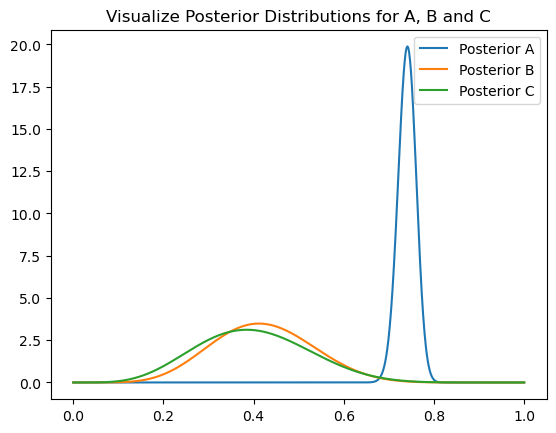

In [3]:
import numpy as np
import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,1001)
plt.plot(parameter_domain, stats.beta(alpha_a, beta_a).pdf(parameter_domain), label="Posterior A")
plt.plot(parameter_domain, stats.beta(alpha_b, beta_b).pdf(parameter_domain), label="Posterior B")
plt.plot(parameter_domain, stats.beta(alpha_c, beta_c).pdf(parameter_domain), label="Posterior C")
plt.title("Visualize Posterior Distributions for A, B and C")
plt.legend()
plt.show()

Our result shows that the machine A was selected for a draw 200 times in a row. From the graph, we can also see that the overlaps between the posterior A and other posteriors are relatively small. Also, it is noticeable that the variance around the mean for posterior A is small. This indicates that we can be confident about our choice of the "winner" and choose vending machine A whenever we are thirsty.

In fact, the true parameter for machine A that we arbitrarily set in the beginning of the analysis was the highest among the machines.